In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [2]:
# import the data 

df= pd.read_csv("C:/Users/SALONI AGRAWAL/Desktop/Encrytix/Titanic-Dataset.csv")

In [3]:
# printing the first five columns

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# descriptives for the dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# shape of the dataset

df.shape

(891, 12)

In [6]:
# getting some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# checking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# handling missing values
# dropping the columm 'Cabin'because it has too mnay null values

titanic_dataset= df.drop(columns= 'Cabin', axis=1)
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# replacing the null values in age column by their mean

titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace= True)

C:\Temp\ipykernel_7276\842988596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(), inplace= True)


In [10]:
# finding the mode of embarked column replacing the null values in Embarked column with it

embarked_mode= titanic_dataset['Embarked'].mode()[0]
titanic_dataset['Embarked'].fillna(embarked_mode, inplace= True)

C:\Temp\ipykernel_7276\2390622880.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Embarked'].fillna(embarked_mode, inplace= True)


In [11]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
# number of survived people amd not survived people

titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

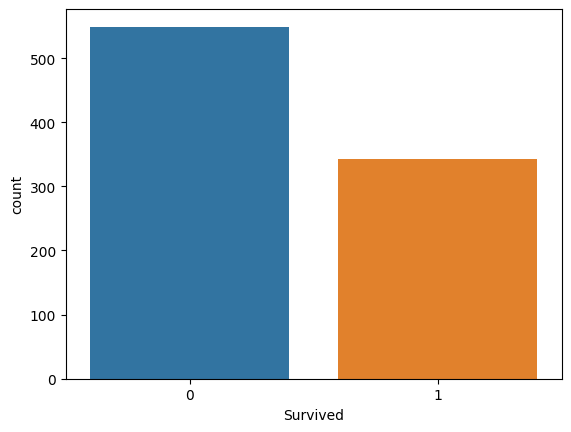

In [14]:
# plotting a countplot for survived column 

sns.countplot(x='Survived', data= titanic_dataset)

In [16]:
# distribution of Pclass( Passenger class)

titanic_dataset['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

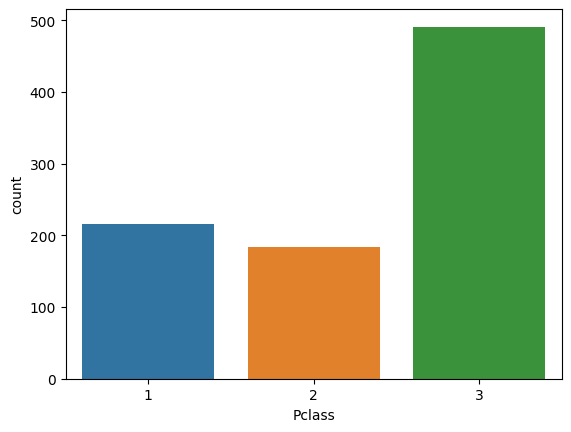

In [20]:
sns.countplot(x= 'Pclass', data= titanic_dataset)

<Axes: xlabel='Pclass', ylabel='count'>

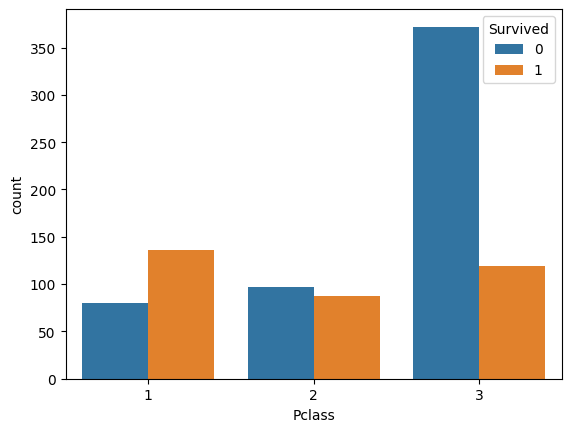

In [22]:
# plotting a countplot for Pclass on the basis of survival

sns.countplot(x= 'Pclass', hue= 'Survived', data= titanic_dataset)

In [23]:
# Sex distribution in the dataset

titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
# encoding Sex into binary form 

titanic_dataset.replace({'Sex': {'male':0, 'female':1}}, inplace= True)
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C


In [33]:
# Embarked distribution in the dataset

titanic_dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [90]:
# encoding embarked column 

titanic_dataset.replace({'Embarked': {'S':0, 'C': 1, 'Q':2}}, inplace= True)
titanic_dataset.head(10)

C:\Temp\ipykernel_7276\1567033664.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_dataset.replace({'Embarked': {'S':0, 'C': 1, 'Q':2}}, inplace= True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


<Axes: xlabel='Sex', ylabel='count'>

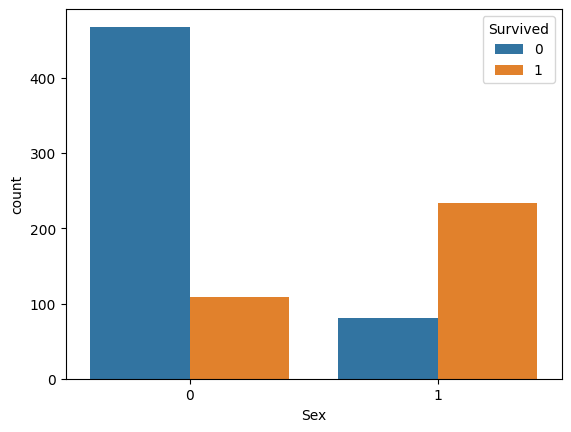

In [91]:
# creating a countplot for gender on the basis of survived

sns.countplot(x= 'Sex', hue= 'Survived', data= titanic_dataset)

([<matplotlib.patches.Wedge at 0x19f1322cf40>,
 [Text(-0.1410738307906361, -1.0909162086366007, '1'),
  Text(0.14107372865168882, 1.0909162218448811, '0')],
 [Text(-0.07694936224943785, -0.595045204710873, '68.1%'),
  Text(0.0769493065372848, 0.5950452119153896, '31.9%')])

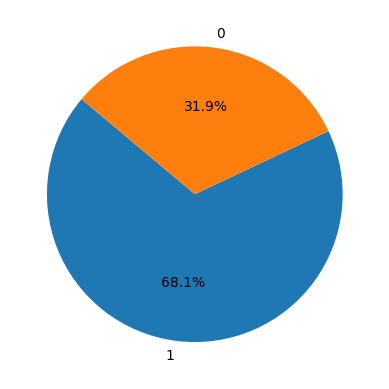

In [92]:
# creating a pie chart for the percentage of people survived by gender

survived= titanic_dataset[titanic_dataset['Survived']==1]
gender_count= survived['Sex'].value_counts()

plt.pie(gender_count, labels= gender_count.index, autopct='%1.1f%%', startangle=140)

([<matplotlib.patches.Wedge at 0x19f13253bb0>,
 [Text(-0.9371113443604221, -0.5760402141092258, '1'),
  Text(1.0663403092403516, -0.27003396988007156, '3'),
  Text(-0.08076372388987925, 1.097031093863542, '2')],
 [Text(-0.5111516423784119, -0.31420375315048676, '39.8%'),
  Text(0.5816401686765554, -0.14729125629822082, '34.8%'),
  Text(-0.044052940303570494, 0.598380596652841, '25.4%')])

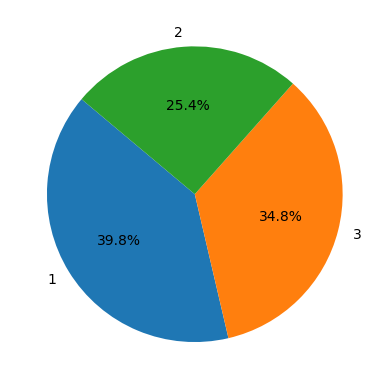

In [93]:
# Creating a pie chart for people survived on the basis of Pclass

survived= titanic_dataset[titanic_dataset['Survived']==1]
Pclass_count= survived['Pclass'].value_counts()

plt.pie(Pclass_count, labels= Pclass_count.index, autopct= '%1.1f%%', startangle= 140)

In [94]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [95]:
# creating datasets to split

x= titanic_dataset.drop(['PassengerId', 'Name', 'Survived', 'Ticket'], axis= 1)
y= titanic_dataset['Survived']


In [96]:
# splitting the data into train and test

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [97]:
print(x.shape, x_train.shape, x_test.shape)

(891, 7) (712, 7) (179, 7)


In [98]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
375,1,1,29.699118,1,0,82.1708,1
367,3,1,29.699118,0,0,7.2292,1
99,2,0,34.000000,1,0,26.0000,0
450,2,0,36.000000,1,2,27.7500,0
560,3,0,29.699118,0,0,7.7500,2
...,...,...,...,...,...,...,...
523,1,1,44.000000,0,1,57.9792,1
162,3,0,26.000000,0,0,7.7750,0
731,3,0,11.000000,0,0,18.7875,1
816,3,1,23.000000,0,0,7.9250,0


In [99]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 375 to 820
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [100]:
y_train

375    1
367    1
99     0
450    0
560    0
      ..
523    1
162    0
731    0
816    0
820    1
Name: Survived, Length: 712, dtype: int64

In [103]:
# training the logistic regression model

model= LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [106]:
# model evaluation and accuracy score

x_train_prediction= model.predict(x_train)
print(x_train_prediction)

[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1
 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 

In [109]:
# chceking the accuracy using training data 

accuracy= accuracy_score(x_train_prediction, y_train)
print(accuracy)

0.8061797752808989


In [111]:
# checking the accracy using testing data 

x_test_prediction= model.predict(x_test)
test_accuracy= accuracy_score(x_test_prediction, y_test)
print(test_accuracy)

0.7877094972067039
